In [138]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random



In [139]:
#Loading Demographic Data
df = pd.read_csv("gen_data/DOE_Demographic.csv")
df


,DBN,School Name,Year,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,...,% White,# Missing Race/Ethnicity Data,% Missing Race/Ethnicity Data,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2017-18,190,0,17,28,32,33,23,...,0.032,0,0.000,49,0.258,8,0.042,161,84.7%,89.0%
1,01M015,P.S. 015 Roberto Clemente,2018-19,174,0,13,20,33,30,30,...,0.034,0,0.000,39,0.224,8,0.046,147,84.5%,88.8%
2,01M015,P.S. 015 Roberto Clemente,2019-20,190,0,14,29,28,38,33,...,0.047,0,0.000,46,0.242,17,0.089,155,81.6%,86.7%
3,01M015,P.S. 015 Roberto Clemente,2020-21,193,0,17,29,29,27,30,...,0.057,0,0.000,44,0.228,21,0.109,161,83.4%,86.4%
4,01M015,P.S. 015 Roberto Clemente,2021-22,179,0,15,30,26,24,22,...,0.067,0,0.000,38,0.212,11,0.061,150,83.8%,87.9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9246,84X730,Bronx Charter School for the Arts,2017-18,314,0,0,50,51,54,51,...,0.003,0,0.000,68,0.217,57,0.182,258,82.2%,89.1%
9247,84X730,Bronx Charter School for the Arts,2018-19,430,0,0,49,54,49,54,...,0.007,0,0.000,103,0.240,71,0.165,363,84.4%,88.8%
9248,84X730,Bronx Charter School for the Arts,2019-20,523,0,0,51,50,53,52,...,0.010,0,0.000,117,0.224,69,0.132,453,86.6%,89.2%
9249,84X730,Bronx Charter School for the Arts,2020-21,626,0,0,38,52,53,55,...,0.006,1,0.002,152,0.243,78,0.125,547,87.4%,88.9%


In [140]:
#Loading attendance data
XLS = pd.ExcelFile("gen_data/attendance_data.xlsx")
df_att = pd.read_excel(XLS, "All Students")
df_att = df_att.drop(columns = ["Category", "# Contributing 10+ Total Days and 1+ Pres Day"], axis = 1)
df_att_no_s = df_att.drop(df_att[df_att["% Chronically Absent"] == "s"].index)
df_att_no_s.reset_index(drop = True, inplace = True)


df_att_no_s

,DBN,School Name,Grade,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Chronically Absent,% Chronically Absent
0,01M015,P.S. 015 Roberto Clemente,All Grades,2017-18,33264,2078,31186,93.753006,37,18.87755
1,01M015,P.S. 015 Roberto Clemente,All Grades,2018-19,30887,2278,28609,92.624725,47,24.479166
2,01M015,P.S. 015 Roberto Clemente,All Grades,2019-20,21101,1500,19601,92.891335,58,28.431372
3,01M015,P.S. 015 Roberto Clemente,All Grades,2020-21,32686,3931,28755,87.973442,84,42.211056
4,01M015,P.S. 015 Roberto Clemente,All Grades,2021-22,31663,4751,26912,84.995102,113,59.473682
...,...,...,...,...,...,...,...,...,...,...
51704,75X811,P.S. X811,12,2017-18,57360,9870,47490,82.792885,194,57.738094
51705,75X811,P.S. X811,12,2018-19,62398,10686,51712,82.874451,200,55.09642
51706,75X811,P.S. X811,12,2019-20,39800,6585,33215,83.454773,194,55.113636
51707,75X811,P.S. X811,12,2020-21,68770,15327,53443,77.712662,224,56.281406


In [141]:
#merge 
df_merge = pd.merge(df_att_no_s, df, on = ['DBN', 'School Name', 'Year'])


In [142]:
#Additional Data Cleaning
random.uniform(95, 100)
df_merge['% Poverty'] = df_merge['% Poverty'].apply(lambda x: random.uniform(96, 100) if x == 'Above 95%' else x.strip("%"))
df_merge['Economic Need Index'] = df_merge['Economic Need Index'].apply(lambda x: random.uniform(96, 100) if x == 'Above 95%' else x.strip("%"))
df_merge['% Chronically Absent'] = df_merge['% Chronically Absent'].apply(lambda x: random.uniform(96, 100) if x == 'Above 95%' else x)
df_merge = df_merge.drop(columns = ["# Poverty", '# Days Absent', '# Days Present', '% Attendance', '# Chronically Absent', '# Male', '# Asian', '# Black', '# Hispanic', '# Multi-Racial', '# Native American', '# White', '# Missing Race/Ethnicity Data', '# Students with Disabilities', '# English Language Learners', '# Poverty', '# Total Days'], axis = 1)
df_merge = df_merge.astype({'% Poverty':  float, 'Economic Need Index': float, '% Chronically Absent':float})



In [143]:
df_merge['% Poverty'].value_counts()

92.600000    257
93.000000    257
92.200000    257
84.700000    253
91.000000    247
            ... 
99.362809      1
99.991941      1
96.208487      1
96.587031      1
97.095006      1
Name: % Poverty, Length: 6204, dtype: int64

In [144]:
#Creating Borough and School District Columns
df_merge["Borough"] = df_merge["DBN"].apply(lambda x: x[2:3])
df_merge["Borough"] = df_merge["Borough"].map({"K":"Brooklyn", "X":"Bronx", "Q":"Queens", "M":"Manhattan", "R": "Staten Island"})
df_merge["School District"] = df_merge["DBN"].apply(lambda x: x[0:2])
#df_merge.drop(columns = ["DBN"], axis = 1, inplace = True)


In [145]:
df_merge


,DBN,School Name,Grade,Year,% Chronically Absent,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,...,% Multi-Racial,% Native American,% White,% Missing Race/Ethnicity Data,% Students with Disabilities,% English Language Learners,% Poverty,Economic Need Index,Borough,School District
0,01M015,P.S. 015 Roberto Clemente,All Grades,2017-18,18.877550,190,0,17,28,32,...,0.005,0.005,0.032,0.0,0.258,0.042,84.700000,89.000000,Manhattan,01
1,01M015,P.S. 015 Roberto Clemente,PK in K-12 Schools,2017-18,22.222221,190,0,17,28,32,...,0.005,0.005,0.032,0.0,0.258,0.042,84.700000,89.000000,Manhattan,01
2,01M015,P.S. 015 Roberto Clemente,0K,2017-18,28.571428,190,0,17,28,32,...,0.005,0.005,0.032,0.0,0.258,0.042,84.700000,89.000000,Manhattan,01
3,01M015,P.S. 015 Roberto Clemente,1,2017-18,18.181818,190,0,17,28,32,...,0.005,0.005,0.032,0.0,0.258,0.042,84.700000,89.000000,Manhattan,01
4,01M015,P.S. 015 Roberto Clemente,2,2017-18,9.090909,190,0,17,28,32,...,0.005,0.005,0.032,0.0,0.258,0.042,84.700000,89.000000,Manhattan,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51408,75X811,P.S. X811,12,2020-21,56.281406,650,0,0,0,0,...,0.000,0.020,0.029,0.0,0.992,0.363,97.095006,99.856775,Bronx,75
51409,75X811,P.S. X811,All Grades,2021-22,72.742203,607,0,0,0,0,...,0.002,0.026,0.033,0.0,1.000,0.357,94.900000,99.509898,Bronx,75
51410,75X811,P.S. X811,9,2021-22,70.370369,607,0,0,0,0,...,0.002,0.026,0.033,0.0,1.000,0.357,94.900000,97.130932,Bronx,75
51411,75X811,P.S. X811,11,2021-22,65.591400,607,0,0,0,0,...,0.002,0.026,0.033,0.0,1.000,0.357,94.900000,98.651307,Bronx,75


/var/folders/cv/wb903gfd5v1dl5wd51qpkw480000gn/T/ipykernel_89551/2711508812.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df_merge.groupby("Year").mean()


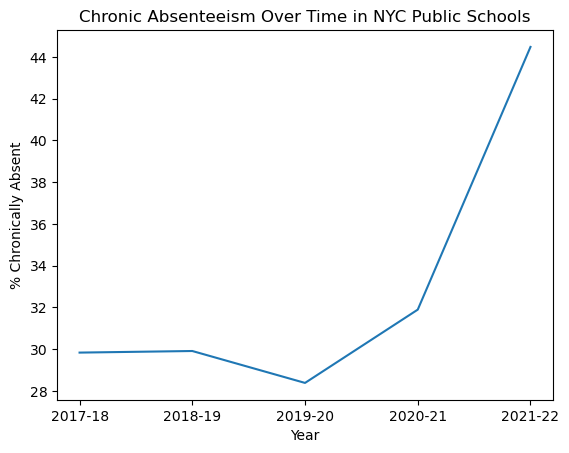

In [146]:
group = df_merge.groupby("Year").mean()
group.reset_index(inplace = True)

sns.lineplot(data= group, x= "Year", y= "% Chronically Absent")

ax = plt.gca()

# set title
ax.set_title('Chronic Absenteeism Over Time in NYC Public Schools');



/var/folders/cv/wb903gfd5v1dl5wd51qpkw480000gn/T/ipykernel_89551/3253173522.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough  = df_merge.groupby("Borough").mean().reset_index()


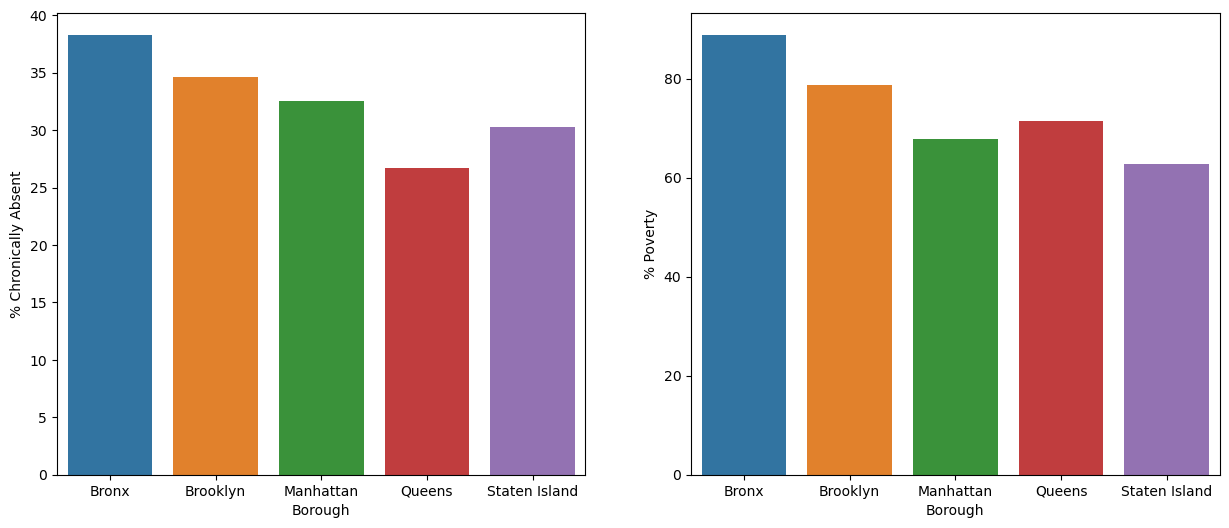

In [147]:
borough  = df_merge.groupby("Borough").mean().reset_index()
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(data = borough, x = "Borough", y = "% Chronically Absent", ax = axes[0]);
sns.barplot(data = borough, x = "Borough", y = "% Poverty", ax = axes[1]);

45.6790123

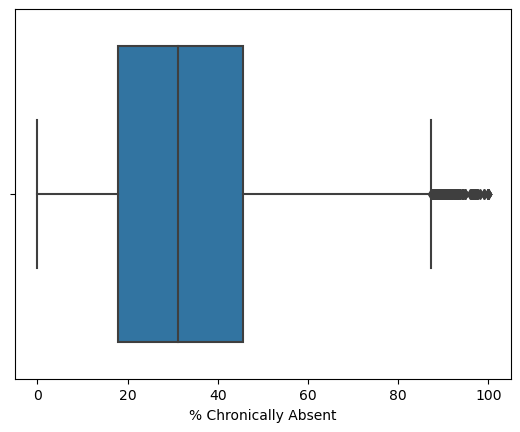

In [148]:
sns.boxplot(x = df_merge["% Chronically Absent"]);
df_merge["% Chronically Absent"].quantile(q = 0.75)

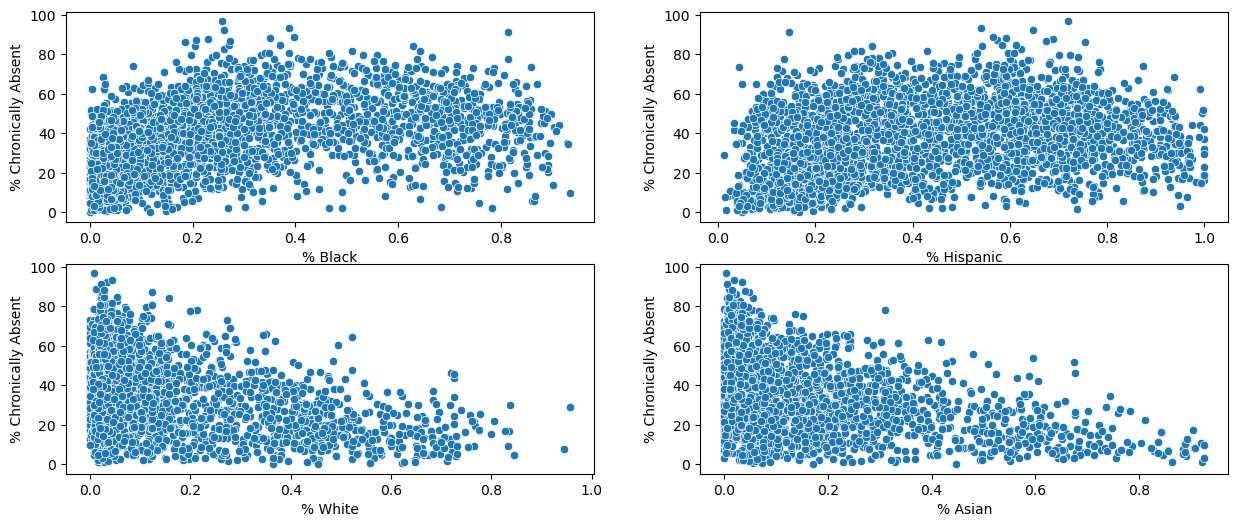

In [154]:
the_merge_filt = df_merge[(df_merge["Year"] == '2021-22') | (df_merge["Year"] == '2020-21')]
group = the_merge_filt[the_merge_filt["Grade"] == "All Grades"]

fix, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

sns.scatterplot(data=group, x="% Black", y="% Chronically Absent", ax = axes[0,0]);
sns.scatterplot(data=group, x="% Hispanic", y="% Chronically Absent", ax = axes[0,1]);
sns.scatterplot(data=group, x="% White", y="% Chronically Absent", ax = axes[1,0]);
sns.scatterplot(data=group, x="% Asian", y="% Chronically Absent", ax = axes[1,1]);

# set title
ax.set_title('Chronic Absenteeism Over Time in NYC Public Schools');


In [152]:
group

,DBN,School Name,Grade,Year,% Chronically Absent,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,...,% Multi-Racial,% Native American,% White,% Missing Race/Ethnicity Data,% Students with Disabilities,% English Language Learners,% Poverty,Economic Need Index,Borough,School District
24,01M015,P.S. 015 Roberto Clemente,All Grades,2020-21,42.211056,193,0,17,29,29,...,0.005,0.000,0.057,0.000,0.228,0.109,83.400000,86.400000,Manhattan,01
32,01M015,P.S. 015 Roberto Clemente,All Grades,2021-22,59.473682,179,0,15,30,26,...,0.017,0.000,0.067,0.000,0.212,0.061,83.800000,87.900000,Manhattan,01
64,01M019,P.S. 019 Asher Levy,All Grades,2020-21,23.474178,212,0,13,23,25,...,0.033,0.005,0.080,0.014,0.410,0.042,71.700000,69.600000,Manhattan,01
72,01M019,P.S. 019 Asher Levy,All Grades,2021-22,52.380951,176,9,7,22,20,...,0.045,0.006,0.119,0.017,0.409,0.034,70.500000,67.800000,Manhattan,01
104,01M020,P.S. 020 Anna Silver,All Grades,2020-21,23.294117,412,0,37,58,52,...,0.015,0.007,0.073,0.002,0.223,0.119,72.100000,77.000000,Manhattan,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51364,75X721,P.S. X721 - Stephen McSweeney School,All Grades,2021-22,74.561401,547,0,0,0,0,...,0.004,0.009,0.027,0.000,1.000,0.382,93.100000,96.735912,Bronx,75
51382,75X754,J. M. Rapport School Career Development,All Grades,2020-21,84.713379,502,0,0,0,0,...,0.002,0.008,0.028,0.000,0.998,0.291,94.400000,96.934054,Bronx,75
51387,75X754,J. M. Rapport School Career Development,All Grades,2021-22,88.120949,477,0,0,0,0,...,0.002,0.010,0.029,0.000,0.990,0.281,96.148474,96.594978,Bronx,75
51405,75X811,P.S. X811,All Grades,2020-21,55.725189,650,0,0,0,0,...,0.000,0.020,0.029,0.000,0.992,0.363,96.922632,98.087376,Bronx,75


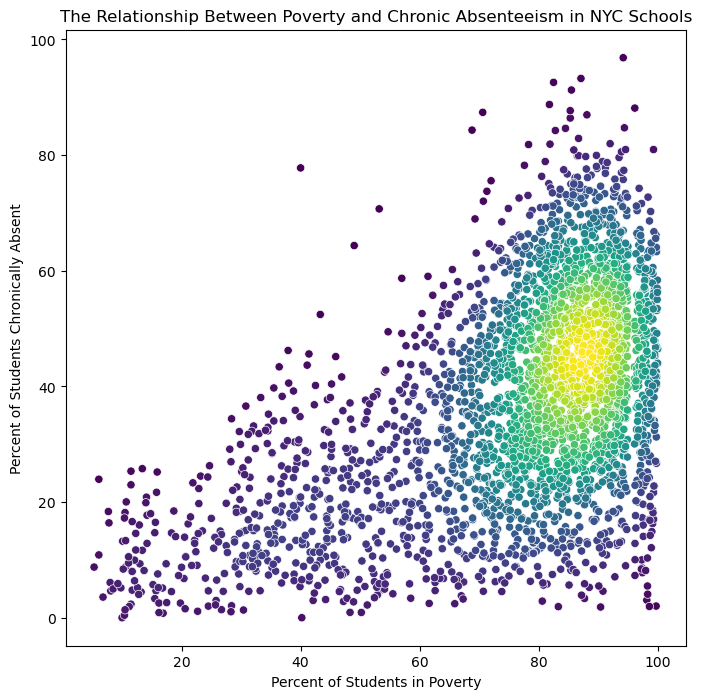

In [155]:
#fix, axes = plt.subplots(figsize=(15, 6))

values = np.vstack([group["% Poverty"], group["% Chronically Absent"]])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=group,
    x="% Poverty",
    y="% Chronically Absent",
    c=kernel,
    cmap="viridis",
    ax=ax,
)

ax.set_title('The Relationship Between Poverty and Chronic Absenteeism in NYC Schools')
ax.set_xlabel('Percent of Students in Poverty')
ax.set_ylabel('Percent of Students Chronically Absent');

In [116]:
val = group["% Chronically Absent"].quantile(q = 0.75)
len(group["% Chronically Absent"])

3053

In [120]:
group

,DBN,School Name,Grade,Year,% Chronically Absent,Total Enrollment,Grade 3K,Grade PK (Half Day & Full Day),Grade K,Grade 1,...,% Students with Disabilities,% English Language Learners,% Poverty,Economic Need Index,Borough,School District,Elementary,Middle,High,School Category
24,01M015,P.S. 015 Roberto Clemente,All Grades,2020-21,42.211056,193,0,17,29,29,...,0.228,0.109,83.400000,86.400000,Manhattan,01,176,0,0,
32,01M015,P.S. 015 Roberto Clemente,All Grades,2021-22,59.473682,179,0,15,30,26,...,0.212,0.061,83.800000,87.900000,Manhattan,01,164,0,0,
64,01M019,P.S. 019 Asher Levy,All Grades,2020-21,23.474178,212,0,13,23,25,...,0.410,0.042,71.700000,69.600000,Manhattan,01,199,0,0,
72,01M019,P.S. 019 Asher Levy,All Grades,2021-22,52.380951,176,9,7,22,20,...,0.409,0.034,70.500000,67.800000,Manhattan,01,160,0,0,
104,01M020,P.S. 020 Anna Silver,All Grades,2020-21,23.294117,412,0,37,58,52,...,0.223,0.119,72.100000,77.000000,Manhattan,01,375,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51364,75X721,P.S. X721 - Stephen McSweeney School,All Grades,2021-22,74.561401,547,0,0,0,0,...,1.000,0.382,93.100000,99.274315,Bronx,75,0,0,547,
51382,75X754,J. M. Rapport School Career Development,All Grades,2020-21,84.713379,502,0,0,0,0,...,0.998,0.291,94.400000,99.891512,Bronx,75,0,0,502,
51387,75X754,J. M. Rapport School Career Development,All Grades,2021-22,88.120949,477,0,0,0,0,...,0.990,0.281,96.402781,96.530677,Bronx,75,0,0,477,
51405,75X811,P.S. X811,All Grades,2020-21,55.725189,650,0,0,0,0,...,0.992,0.363,96.984440,98.204907,Bronx,75,0,0,650,


In [122]:
import pandas as pd
group.reset_index(inplace = True)

def categorize_school(df):
    # calculate the total number of students in elementary, middle, and high school grades
    df['Elementary'] = df[['Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']].sum(axis=1)
    df['Middle'] = df[['Grade 6', 'Grade 7', 'Grade 8']].sum(axis=1)
    df['High'] = df[['Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']].sum(axis=1)
    
    # categorize each school based on the total number of students in each category
    df['School Category'] = ''
    for i in range(len(df)):
        if df.loc[i, 'Elementary'] > 0 and df.loc[i, 'Middle'] == 0 and df.loc[i, 'High'] == 0:
            df.loc[i, 'School Category'] = 'Elementary School'
        elif df.loc[i, 'Elementary'] == 0 and df.loc[i, 'Middle'] > 0 and df.loc[i, 'High'] == 0:
            df.loc[i, 'School Category'] = 'Middle School'
        elif df.loc[i, 'Elementary'] == 0 and df.loc[i, 'Middle'] == 0 and df.loc[i, 'High'] > 0:
            df.loc[i, 'School Category'] = 'High School'
        else:
            df.loc[i, 'School Category'] = 'Mixed'
    
    return df

group_cat = categorize_school(group)


/var/folders/cv/wb903gfd5v1dl5wd51qpkw480000gn/T/ipykernel_89551/1998756540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Elementary'] = df[['Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5']].sum(axis=1)
/var/folders/cv/wb903gfd5v1dl5wd51qpkw480000gn/T/ipykernel_89551/1998756540.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Middle'] = df[['Grade 6', 'Grade 7', 'Grade 8']].sum(axis=1)
/var/folders/cv/wb903gfd5v1dl5wd51qpkw480000gn/T/ipykernel_89551/1998756540.py:8: Setting

/var/folders/cv/wb903gfd5v1dl5wd51qpkw480000gn/T/ipykernel_89551/1476063373.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_2 = group_cat.groupby("School Category").mean()


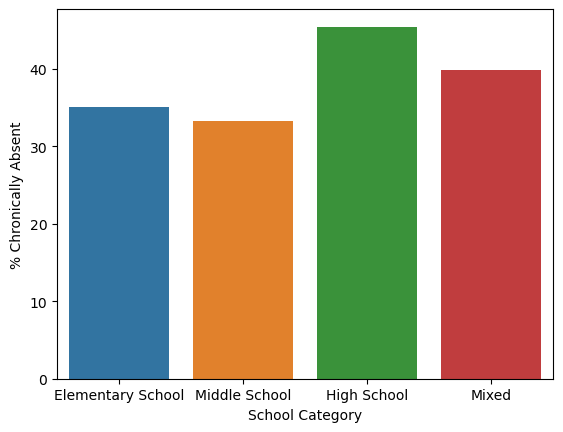

In [137]:
group_2 = group_cat.groupby("School Category").mean()

group_2 = group_2.reset_index()

group_2

category_order = ['Elementary School', 'Middle School', 'High School', 'Mixed']

sns.barplot(data = group_2, x = "School Category", y = "% Chronically Absent", order = category_order );



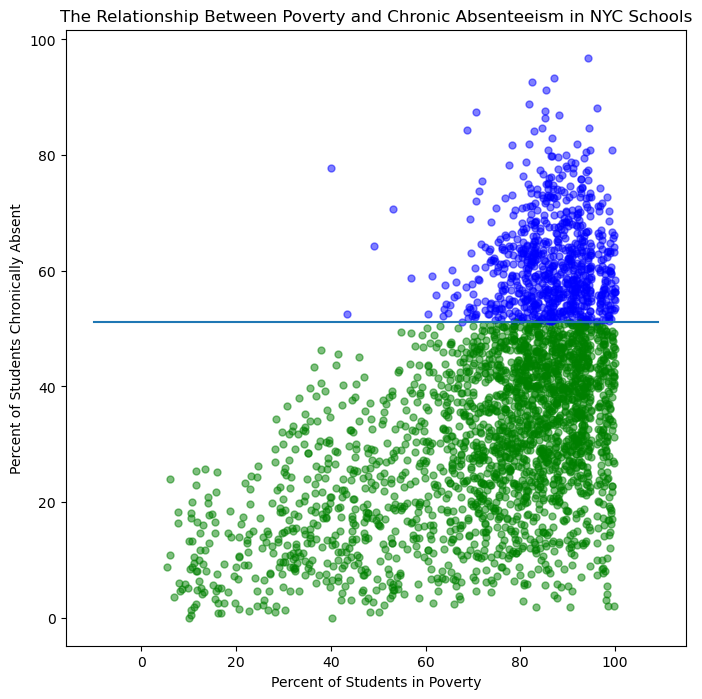

In [156]:
# Create scatter plot with line
group.reset_index(inplace = True)
#z = sns.scatterplot(data=group, x="% Poverty", y="% Chronically Absent")
#axhline(group["% Chronically Absent"].quantile(q = 0.75), linewidth=2, color = "red")
fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(x=range(-10,110), y=group["% Chronically Absent"].quantile(q = 0.75))
#Iterate over data points and assign colors based on position relative to line
for i in range(len(group["% Chronically Absent"])):
    if group["% Chronically Absent"][i] > val:
        plt.scatter(group["% Poverty"][i], group["% Chronically Absent"][i], color='blue', marker = 'o', s = 25, alpha = .5)
    else:
        plt.scatter(group["% Poverty"][i], group["% Chronically Absent"][i], color='green', marker = 'o', s = 25, alpha = .5)
        
ax.set_title('The Relationship Between Poverty and Chronic Absenteeism in NYC Schools')
ax.set_xlabel('Percent of Students in Poverty')
ax.set_ylabel('Percent of Students Chronically Absent')

plt.show()


In [ ]:
group["% Chronically Absent"][0]

In [ ]:
#Graduation Rates
XLS2 = pd.ExcelFile("gen_data/grad.xlsx")
df_grad = pd.read_excel(XLS2, "All")

In [61]:
df_grad.drop("Unnamed: 0", axis = 1, inplace = True)

In [62]:
df_grad["Cohort"].value_counts()

4 year August    3324
4 year June      3324
5 year August    2858
5 year June      2858
6 year June      2387
Name: Cohort, dtype: int64

In [63]:
df_grad_21_22 = df_grad[(df_grad["Cohort Year"] == 2018) | (df_grad["Cohort Year"] == 2017)]
df_grad_21_22 = df_grad_21_22.drop(df_grad_21_22[df_grad_21_22["% Grads"] == "s"].index)
df_grad_21_22["% Grads"] = df_grad_21_22["% Grads"].astype(float)
df_grad_21_22 = df_grad_21_22[df_grad_21_22["Cohort"] == "4 year August"]
df_grad_21_22["Cohort Year"] = df_grad_21_22["Cohort Year"].apply(lambda x: "2021-22" if x == 2018 else "2020-21")
df_grad_21_22.rename(columns = {"Cohort Year": "Year"}, inplace = True)
df_grad_21_22.reset_index(drop = True, inplace = True)
df_grad_21_22

,DBN,School Name,Category,Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,...,# Regents without Advanced,% Regents without Advanced of Cohort,% Regents without Advanced of Grads,# Local,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2021-22,4 year August,61,57,93.442619,57,93.442619,...,45,73.770493,78.947365,0,0,0,2,3.278688,2,3.278688
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2020-21,4 year August,65,61,93.846153,61,93.846153,...,53,81.53846,86.885246,0,0,0,4,6.153846,0,0
2,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,All Students,2021-22,4 year August,136,132,97.058823,132,97.058823,...,41,30.147058,31.060606,0,0,0,0,0,4,2.941176
3,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,All Students,2020-21,4 year August,134,132,98.507462,132,98.507462,...,61,45.522388,46.21212,0,0,0,0,0,2,1.492537
4,01M450,EAST SIDE COMMUNITY SCHOOL,All Students,2021-22,4 year August,90,86,95.555557,86,95.555557,...,86,95.555557,100,0,0,0,4,4.444445,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,All Students,2020-21,4 year August,64,63,98.437500,63,98.4375,...,16,25,25.396826,0,0,0,1,1.5625,0,0
932,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,All Students,2021-22,4 year August,79,72,91.139244,72,91.139244,...,43,54.430378,59.722221,0,0,0,5,6.329114,2,2.531646
933,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,All Students,2020-21,4 year August,70,59,84.285713,59,84.285713,...,25,35.714287,42.372883,0,0,0,8,11.428572,2,2.857143
934,32K564,BUSHWICK COMMUNITY HIGH SCHOOL,All Students,2021-22,4 year August,47,9,19.148935,8,17.021276,...,8,17.021276,88.888886,1,2.12766,11.111111,26,55.319149,7,14.893617


In [64]:
#merge 
the_chronic = df_merge[["DBN", "Year", "Grade", "Borough", "School District", "% Chronically Absent"]]
the_chronic = the_chronic[(the_chronic["Year"] == '2021-22') | (the_chronic["Year"] == '2020-21')]
the_chronic = the_chronic[the_chronic["Grade"] == 12]
the_chronic.reset_index(drop = True, inplace = True)


In [65]:
df_merge_2 = pd.merge(df_grad_21_22, the_chronic, on = ["DBN", "Year"])

In [66]:
df_merge_2

,DBN,School Name,Category,Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,% Total Regents of Cohort,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,Grade,Borough,School District,% Chronically Absent
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2021-22,4 year August,61,57,93.442619,57,93.442619,...,0,0,2,3.278688,2,3.278688,12,Manhattan,01,84.126984
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,2020-21,4 year August,65,61,93.846153,61,93.846153,...,0,0,4,6.153846,0,0,12,Manhattan,01,56.060608
2,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,All Students,2021-22,4 year August,136,132,97.058823,132,97.058823,...,0,0,0,0,4,2.941176,12,Manhattan,01,63.909775
3,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,All Students,2020-21,4 year August,134,132,98.507462,132,98.507462,...,0,0,0,0,2,1.492537,12,Manhattan,01,48.120300
4,01M450,EAST SIDE COMMUNITY SCHOOL,All Students,2021-22,4 year August,90,86,95.555557,86,95.555557,...,0,0,4,4.444445,0,0,12,Manhattan,01,36.263737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,32K552,THE ACADEMY OF URBAN PLANNING AND ENGINEERING,All Students,2020-21,4 year August,55,55,100.000000,55,100,...,0,0,0,0,0,0,12,Brooklyn,32,33.928570
811,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,All Students,2021-22,4 year August,64,63,98.437500,63,98.4375,...,0,0,0,0,1,1.5625,12,Brooklyn,32,38.709679
812,32K554,ALL CITY LEADERSHIP SECONDARY SCHOOL,All Students,2020-21,4 year August,64,63,98.437500,63,98.4375,...,0,0,1,1.5625,0,0,12,Brooklyn,32,15.625000
813,32K556,BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...,All Students,2021-22,4 year August,79,72,91.139244,72,91.139244,...,0,0,5,6.329114,2,2.531646,12,Brooklyn,32,72.839508


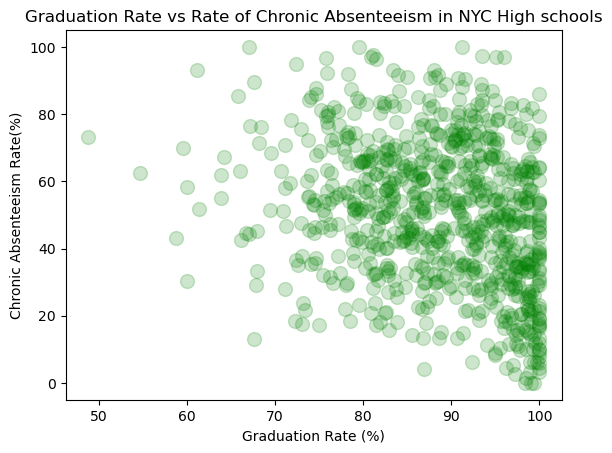

In [67]:
fig, ax = plt.subplots()
ax.scatter(df_merge_2['% Grads'], df_merge_2['% Chronically Absent'] , marker = 'o', s = 100, alpha = .2, c = 'g')
ax.set_xlabel('Graduation Rate (%)')
ax.set_ylabel('Chronic Absenteeism Rate(%)' )
ax.set_title("Graduation Rate vs Rate of Chronic Absenteeism in NYC High schools")
plt.show()

Text(0, 0.5, 'School Graduation Rate ')

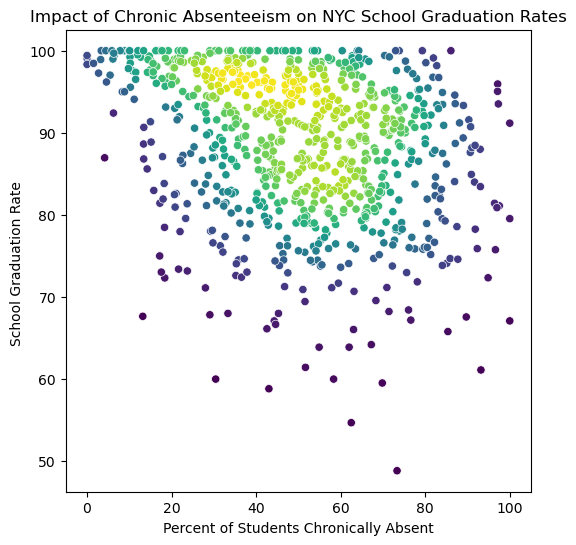

In [68]:
#sns.scatterplot(data=df_merge_2, x="% Grads", y="% Chronically Absent");

values = np.vstack([df_merge_2["% Grads"], df_merge_2["% Chronically Absent"]])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=df_merge_2,
    x='% Chronically Absent',
    y="% Grads",
    c=kernel,
    cmap="viridis",
    ax=ax,
)

ax.set_title('Impact of Chronic Absenteeism on NYC School Graduation Rates')
ax.set_xlabel('Percent of Students Chronically Absent')
ax.set_ylabel('School Graduation Rate ')

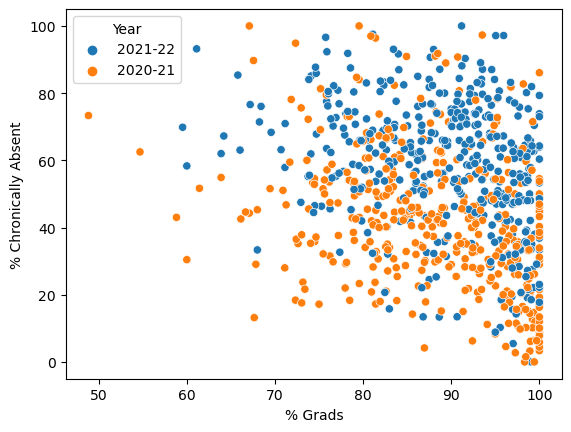

In [238]:
sns.scatterplot(data=df_merge_2, x="% Grads", y="% Chronically Absent", hue = "Year");

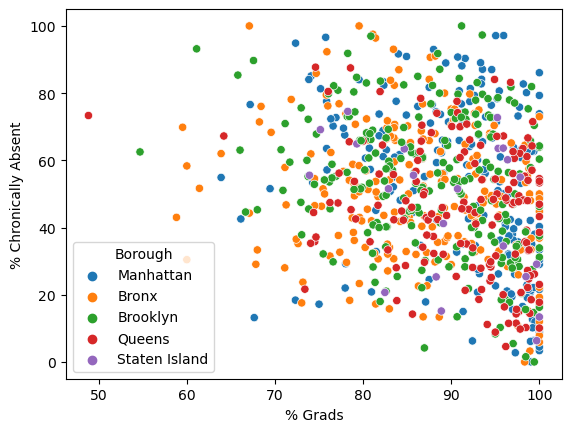

In [239]:
sns.scatterplot(data=df_merge_2, x="% Grads", y="% Chronically Absent", hue = "Borough");

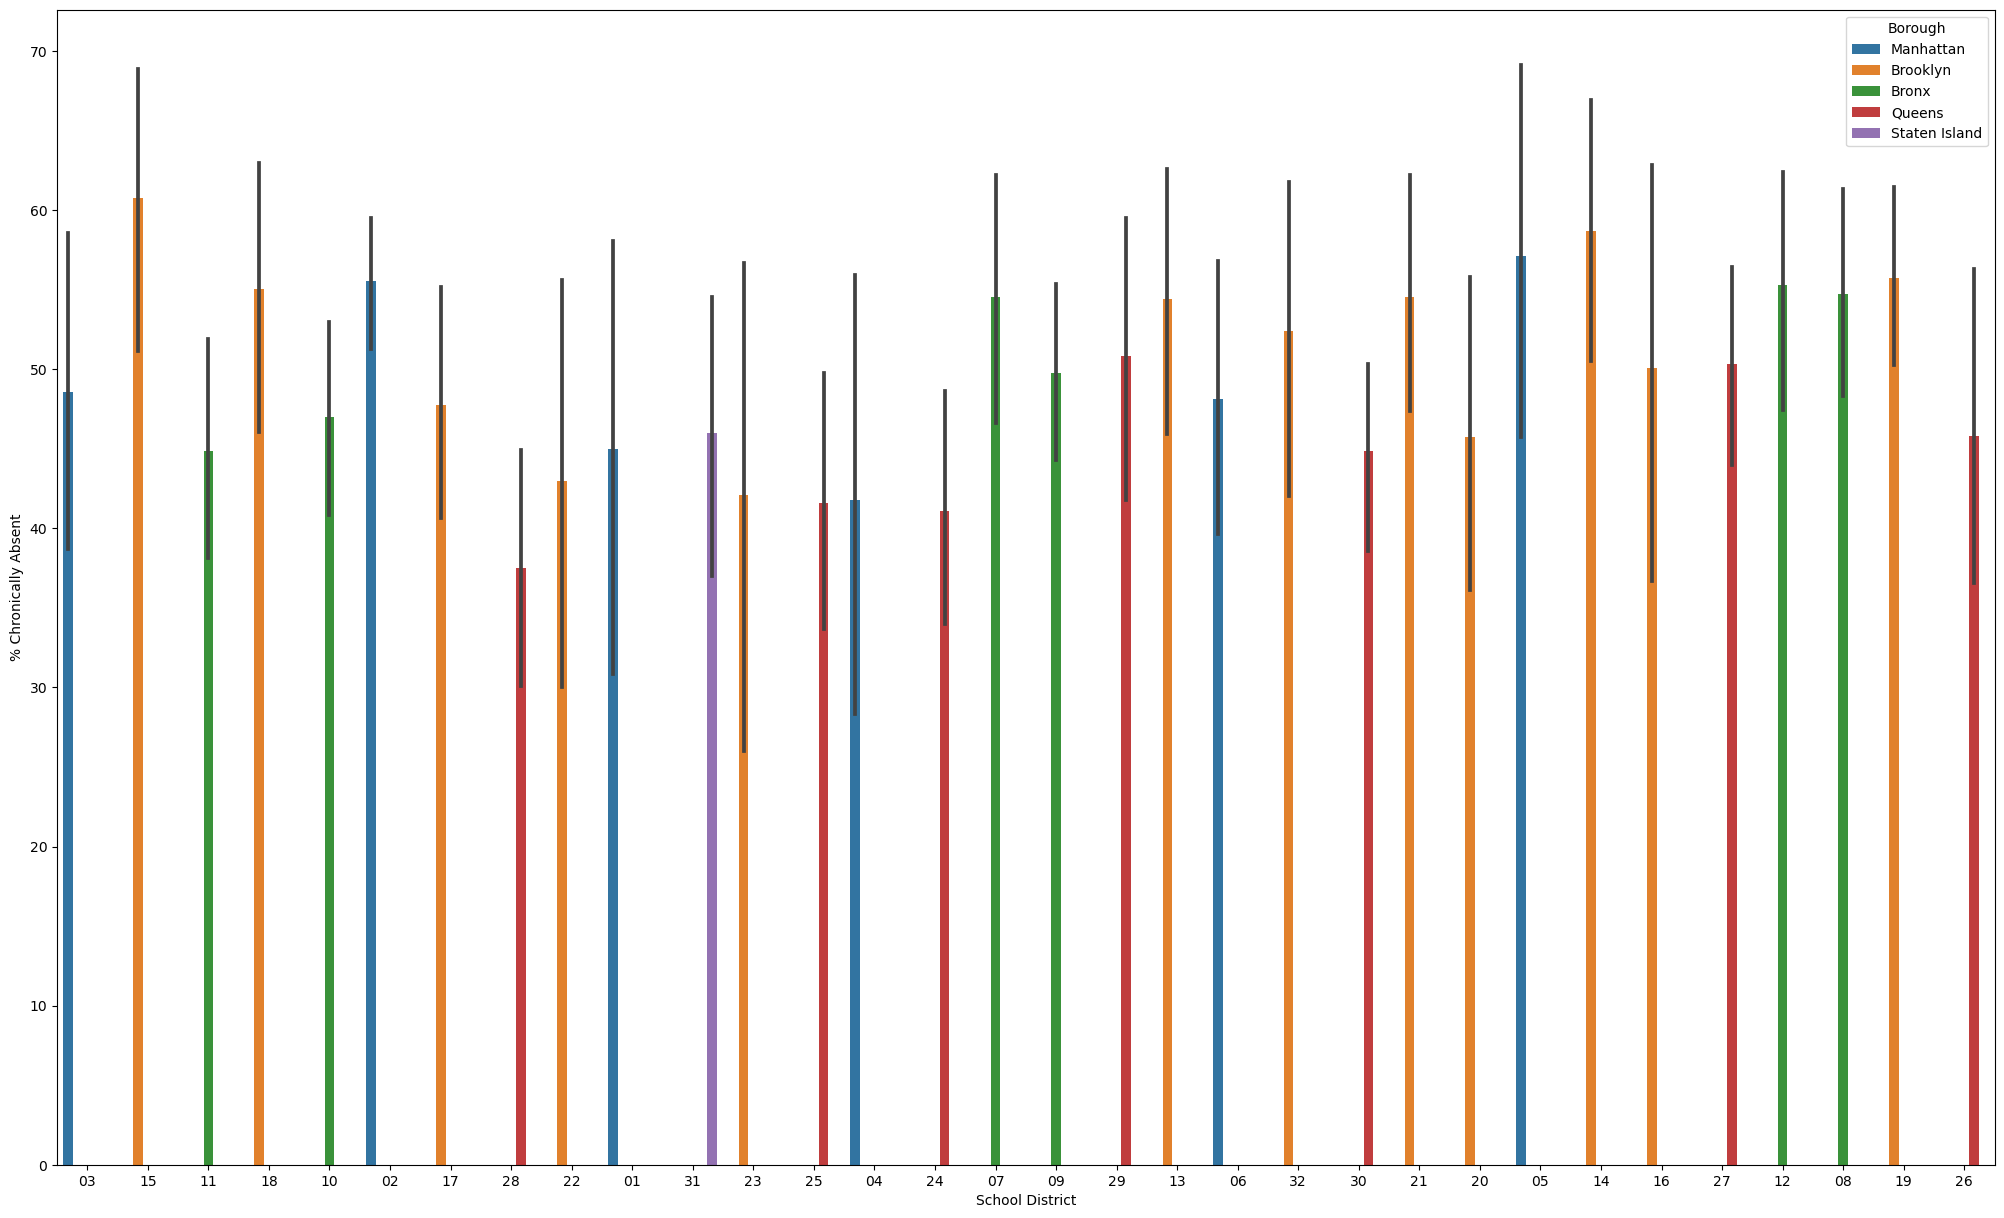

In [248]:
sorted_absent = df_merge_2.sort_values(by="% Chronically Absent")
plt.figure(figsize=(25, 15))

sns.barplot(data=sorted_absent, x="School District", y="% Chronically Absent", hue = "Borough");

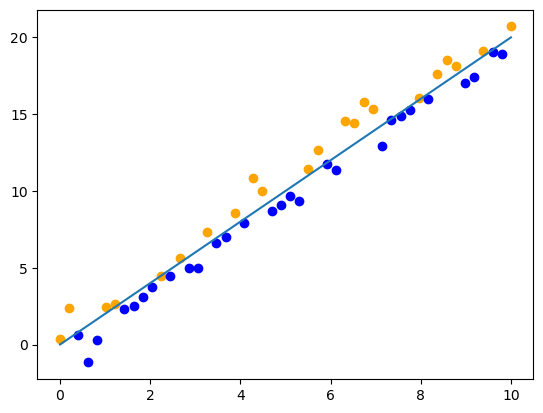

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
x = np.linspace(0, 10, 50)
y = 2 * x + np.random.randn(50)

# Create scatter plot with line
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=2 * x)

# Iterate over data points and assign colors based on position relative to line
for i in range(len(x)):
    if y[i] > 2 * x[i]:
        plt.scatter(x[i], y[i], color='orange')
    else:
        plt.scatter(x[i], y[i], color='blue')

plt.show()